In [117]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.preprocessing import MinMaxScaler
plt.style.use('seaborn-white')

In [118]:
df = pd.read_csv('customer_reduced.csv', sep=',')
df.head(5)

,CustomerID,Imax,Recency,Frequency,MonetaryValue,EntropyProducts
0,12346,74215,325,1,77183.60,0.000000
1,12347,676,1,182,4310.00,4.464578
2,12348,1248,74,27,1437.24,2.987771
3,12349,630,18,72,1457.55,4.276666
4,12350,196,309,16,294.40,2.772589


In [119]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df.values)

## Hierarchical Clustering

In [4]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

### Linkage: COMPLETE

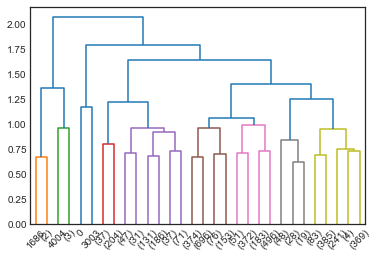

In [5]:
data_distance = pdist(X, metric='euclidean')
data_linkage = linkage(data_distance, method='complete', metric='euclidean')
res = dendrogram(data_linkage, color_threshold=1.0, truncate_mode='lastp')

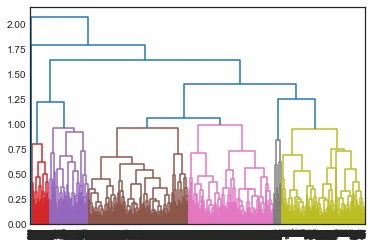

In [6]:
# No truncate mode
res = dendrogram(data_linkage, color_threshold=1.0)

### Linkage: SINGLE

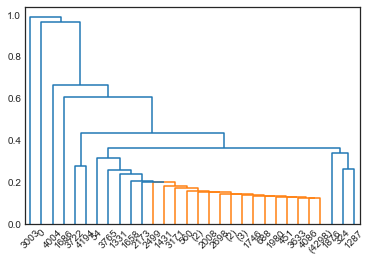

In [7]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.2, truncate_mode='lastp')

### Linkage: AVERAGE

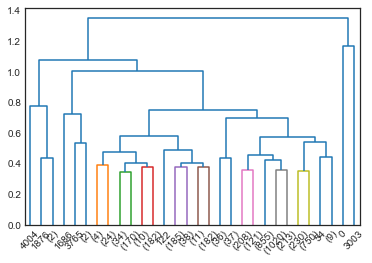

In [8]:
data_distance = pdist(X, metric='euclidean')
data_linkage = linkage(data_distance, method='average', metric='euclidean')
res = dendrogram(data_linkage, color_threshold=0.4, truncate_mode='lastp')

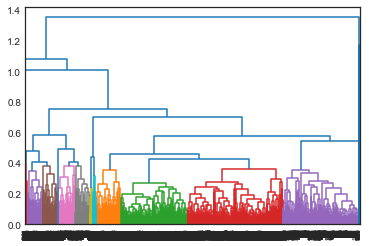

In [9]:
# No truncate mode
res = dendrogram(data_linkage, color_threshold=0.4)

Dai grafici abbiamo ricavato dei possibili valori di K (5 -> 8) da utilizzare nel K-means

## K-Means

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics

### Knee Method per stimare K

In [11]:
sse_list = list()
silhouette_list = list()
separation_list = list()
max_k = 10
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(X)
    sse_list.append(kmeans.inertia_)
    silhouette_list.append(silhouette_score(X, kmeans.labels_))
    separation_list.append(metrics.davies_bouldin_score(X, kmeans.labels_))

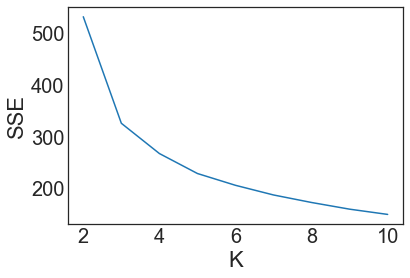

In [12]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

Osservando gli dendrogrammi e il grafico ricavato dal knee method, abbiamo valutato che i valori migliori per K potrebbero essere K = 3, 4, 5, 6. 

In [13]:
k = 2
for i in range(len(sse_list)):
    print("K = ", k+i)
    print("SSE: ", sse_list[i])
    print("Silhouette: ", silhouette_list[i])
    print("Separation: ", separation_list[i])

K =  2
SSE:  532.2898768688483
Silhouette:  0.3308820430864335
Separation:  1.2602007469111562
K =  3
SSE:  326.0508870474157
Silhouette:  0.3907419246835609
Separation:  0.880689832483188
K =  4
SSE:  267.47806479690234
Silhouette:  0.3842658476948422
Separation:  0.953017369333363
K =  5
SSE:  228.80679289058054
Silhouette:  0.31161552039442725
Separation:  1.0954573350455923
K =  6
SSE:  205.96555858847663
Silhouette:  0.30764022127745944
Separation:  1.0711909024714796
K =  7
SSE:  187.26560599300583
Silhouette:  0.28794115680334953
Separation:  1.117544844863715
K =  8
SSE:  172.6917283640928
Silhouette:  0.2832208320858348
Separation:  1.110738438499434
K =  9
SSE:  159.76992693362018
Silhouette:  0.2854493987042253
Separation:  1.1279815327762241
K =  10
SSE:  149.61474647384262
Silhouette:  0.268186411228758
Separation:  1.1629070534509924


In [32]:
print("K:", sse_list.index(min(sse_list)) + 2)
print("K:", silhouette_list.index(max(silhouette_list)) + 2)
print("K:", separation_list.index(min(separation_list)) + 2)

K: 10
K: 3
K: 3


### Grafici con K = 3

In [163]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
kmeans.fit(X)

KMeans(n_clusters=3)

In [164]:
# Controllo il numero di elementi in ogni cluster
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2]), array([1696,  938, 1697], dtype=int64))

In [176]:
#colormap = np.array(['r', 'g', 'b'])
colors = {0: 'red', 1: 'green', 2: 'blue'} # Ho un colore diverso per ognuno dei tre cluster
c = [colors[label] for label in kmeans.labels_] # Assegno ad ogni label il rispettivo colore

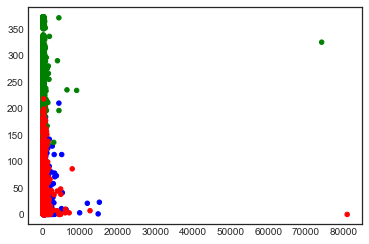

In [177]:
plt.scatter(df['Imax'], df['Recency'], 
            c=c, s=20)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

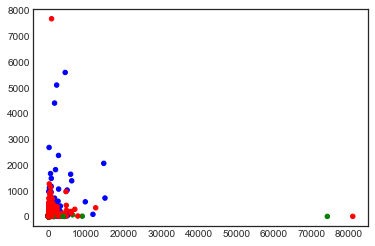

In [178]:
plt.scatter(df['Imax'], df['Frequency'], 
            c=c, s=20)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

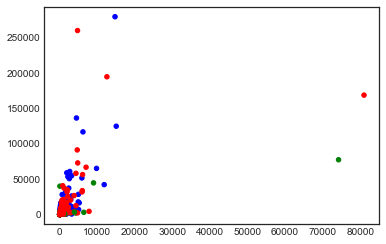

In [179]:
plt.scatter(df['Imax'], df['MonetaryValue'], 
            c=c, s=20)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

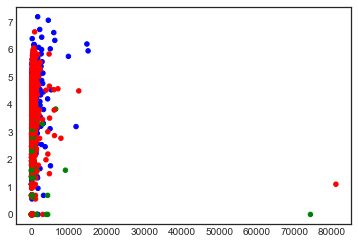

In [180]:
plt.scatter(df['Imax'], df['EntropyProducts'], 
            c=c, s=20)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

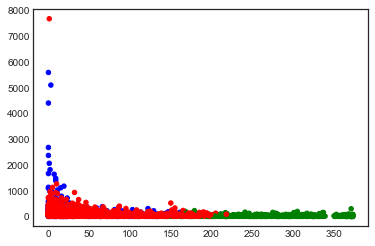

In [181]:
plt.scatter(df['Recency'], df['Frequency'], 
            c=c, s=20)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

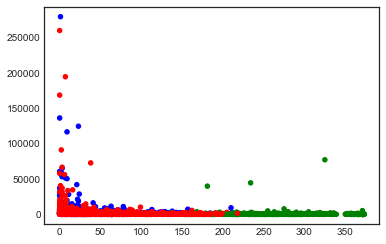

In [182]:
plt.scatter(df['Recency'], df['MonetaryValue'], 
            c=c, s=20)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

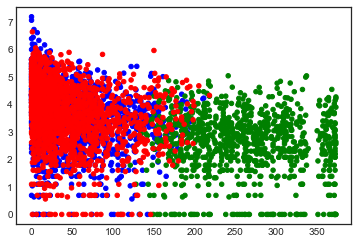

In [183]:
plt.scatter(df['Recency'], df['EntropyProducts'], 
            c=c, s=20)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

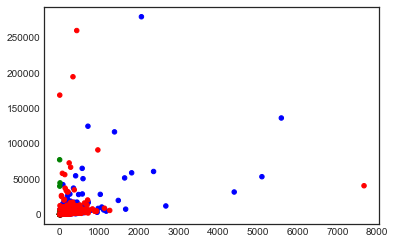

In [184]:
plt.scatter(df['Frequency'], df['MonetaryValue'], 
            c=c, s=20)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

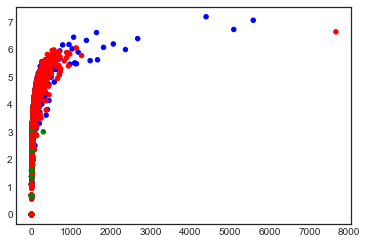

In [185]:
plt.scatter(df['Frequency'], df['EntropyProducts'], 
            c=c, s=20)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

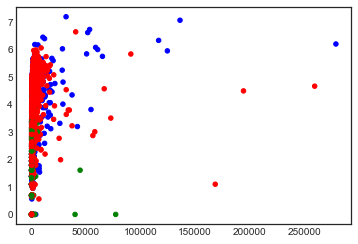

In [186]:
plt.scatter(df['MonetaryValue'], df['EntropyProducts'], 
            c=c, s=20)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

### Knee Method to estimate the best eps

In [188]:
from scipy.spatial.distance import pdist, squareform

In [218]:
dist = pdist(X, 'euclidean') # pair wise distance
print (dist)
dist = squareform(dist) # distance matrix given the vector dist

[1.42574622 1.22905005 1.38921343 ... 0.38768843 0.23397888 0.21118297]


In [221]:
# Questa funzione mi restituisce una lista contentente le distanze rispetto al k-esimo vicino
def calculate_kth_distances(dist, k):
    kth_distances = list()
    for d in dist:
        index_kth_distance = np.argsort(d)[k]
        kth_distances.append(d[index_kth_distance])
    return kth_distances
# Provo diversi valori di k
k_list = [3, 5, 7, 9, 11, 13]
# Dizionario che mi associa il valore di k con le sue rispettive distanze. Esempio: {2 : 2th_distances, 3: 3th_distances, ...}
distances = dict()
# Mi calcolo le kth_distances per ogni valore di k
for k in k_list:
    distances[k] = calculate_kth_distances(dist, k)

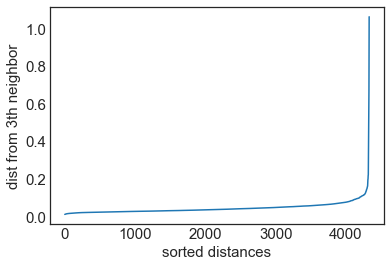

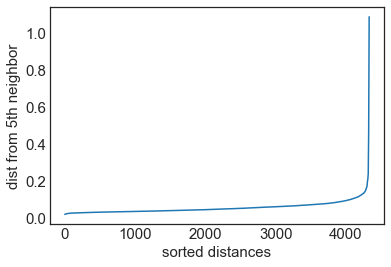

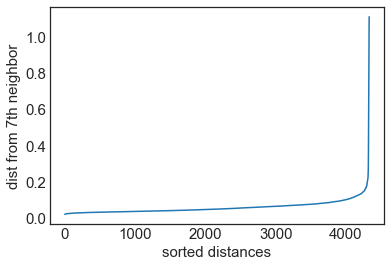

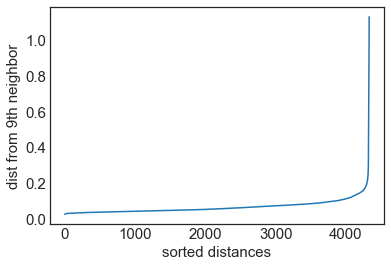

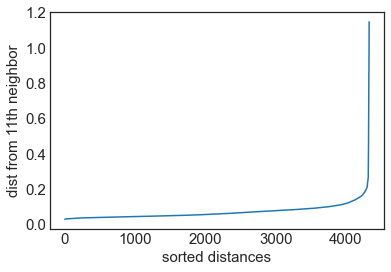

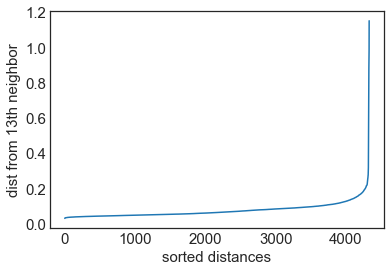

In [223]:
for k in k_list:
    kth_distances = distances[k]
    plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
    plt.ylabel('dist from %sth neighbor' % k, fontsize=15)
    plt.xlabel('sorted distances', fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.show()

Confrontando i grafici, un buon valore di eps potrebbe essere 0.2. Per quanto il valore di k scegliamo 5 in quanto è un valore utilizzato spesso in letteratura.

In [224]:
from sklearn.cluster import DBSCAN

In [225]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.2)

In [226]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0], dtype=int64), array([  14, 4317], dtype=int64))

In [227]:
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

Silhouette 0.4564808616618749
